<a href="https://colab.research.google.com/github/mahalaxmy/Randomforest/blob/main/Randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

E0321040 RANDOM FOREST IMPLEMENTATION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('Cars-RF.csv')


In [ ]:
# Explore the dataset (e.g., df.head(), df.info(), etc.)
# Rename columns if needed (e.g., df.rename(columns={'old_col': 'new_col'}, inplace=True))


In [4]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
 df.rename(columns={'unacc': 'Class'}, inplace=True)

In [9]:
print(df.describe())


       vhigh vhigh.1     2   2.1 small   low  Class
count   1727    1727  1727  1727  1727  1727   1727
unique     4       4     4     3     3     3      4
top     high    high     3     4   med   med  unacc
freq     432     432   432   576   576   576   1209


In [10]:
print(df['Class'].value_counts())
# Repeat for other categorical variables


unacc    1209
acc       384
good       69
vgood      65
Name: Class, dtype: int64


In [11]:
print(df.isnull().sum())


vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
Class      0
dtype: int64


In [12]:
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(X_train.dtypes)


X_train shape: (1381, 6), X_test shape: (346, 6)
vhigh      object
vhigh.1    object
2          object
2.1        object
small      object
low        object
dtype: object


In [14]:
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)


In [15]:
clf_default = RandomForestClassifier(random_state=42)
clf_default.fit(X_train_encoded, y_train)



RandomForestClassifier(random_state=42)

In [16]:

# Vary n_estimators (e.g., 100, 200, 300, etc.)
n_estimators_values = [100, 200, 300]
for n in n_estimators_values:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train_encoded, y_train)
    # Evaluate model performance (e.g., accuracy, etc.)

In [17]:
feature_importances = clf_default.feature_importances_
print("Feature Importances:", feature_importances)


Feature Importances: [0.19764167 0.15312099 0.06098413 0.22855529 0.07936845 0.28032948]


In [22]:

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

low        0.276148
2.1        0.229866
vhigh      0.195801
vhigh.1    0.152767
small      0.083879
2          0.061539
dtype: float64

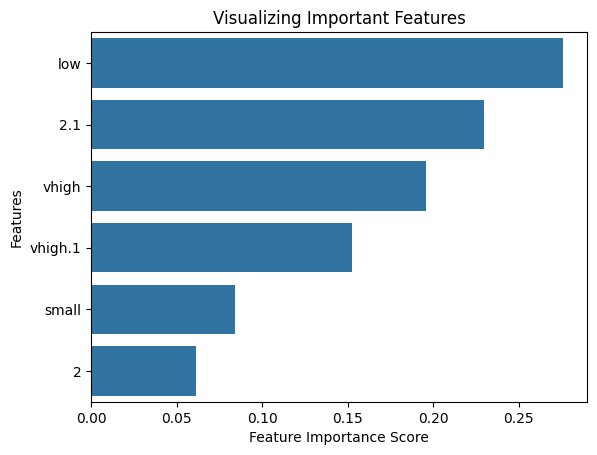

In [24]:
sns.barplot(x=feature_scores, y=feature_scores.index)
import matplotlib.pyplot as plt

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

In [18]:
y_pred = clf_default.predict(X_test_encoded)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[ 72   1   3   1]
 [  2  10   0   3]
 [  1   0 236   0]
 [  2   0   0  15]]


In [19]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

         acc       0.94      0.94      0.94        77
        good       0.91      0.67      0.77        15
       unacc       0.99      1.00      0.99       237
       vgood       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346

